# Predicting Authorship Corpus

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression
import nltk

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!python --version

Python 3.13.0


## Deskriptivní statistika

In [2]:
df = pd.read_csv("./blogtext.csv")
df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [3]:
df['clean_data'] = df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))  # removing all non-letter characters
df['clean_data'] = df['clean_data'].apply(lambda x: x.lower())  # to lower case
df['clean_data'] = df['clean_data'].apply(lambda x: x.strip())  # removing leading and trailing whitespace (spaces, tabs, newlines)

In [4]:
df1 = df[(df['gender'] == 'female') & (df['age'] >= 20) & (df['age'] <= 30)]
df1.shape

(162075, 8)

In [5]:
#from nltk.corpus import stopwords # remove all stop words
#nltk.download('stopwords')
#stopwords=set(stopwords.words('english'))

In [6]:
from collections import Counter

def is_consonant(char):
    return char.lower() in 'bcdfghjklmnpqrstvwxz'

# Spojíme všechny texty do jednoho řetězce
clean_data = ' '.join(df1['clean_data'].dropna().astype(str).tolist()).lower()

# Najdeme všechna slova s alespoň 5 znaky, začínající i končící na souhlásku
words = re.findall(r'\b[a-z]{5,}\b', clean_data)
filtered_words = [word for word in words if is_consonant(word[0]) and is_consonant(word[-1])]


## 10 nejčastěji se opakujících slov 
s minimálním počtem 5 znaků, které začínají a končí na
souhlásku v článcích od žen ve věkovém rozmezí 20 až 30 let (včetně věků 20 a 30 let)
napříč všemi články

In [7]:
# Spočítáme výskyty a zobrazíme 10 nejčastějších
counter = Counter(filtered_words)
counter.most_common(10)

[('think', 77707),
 ('would', 76803),
 ('going', 66990),
 ('which', 47813),
 ('things', 46733),
 ('night', 46599),
 ('still', 45558),
 ('their', 45334),
 ('could', 44746),
 ('something', 42033)]

## 50 nejpodobnějších dvojic slov (min. 6 znaků)

🔤 1. Sequence Similarity (Levenshtein-based)
Co dělá: Porovnává znaky v jejich pořadí
Vzorec: 2 × (společné znaky) / (celková délka)
Výhoda: Skvělé pro překlepy ("program" → "programe")
Váha: 50% (nejdůležitější)

🎲 2. Jaccard Similarity (společné znaky)
Co dělá: Počítá unikátní společné znaky (ignoruje pořadí)
Vzorec: |průnik| / |sjednocení|
Výhoda: Zachytí anagramy ("abc" vs "bca" = 100%)
Váha: 30% (středně důležité)

📏 3. Délková podobnost
Co dělá: Penalizuje velké rozdíly v délce
Vzorec: 1 - |délka1 - délka2| / max(délka1, délka2)
Výhoda: Filtruje nesmyslné páry ("a" vs "programming")
Váha: 20% (pomocná metrika)

🎯 Proč kombinace?
Každá metrika má své slepé místo:

Sequence nerozpozná anagramy
Jaccard ignoruje pořadí (může dát vysoké skóre i nesmyslným párům)
Délka sama o sobě nic neříká o obsahu

Kombinace 50-30-20 je zlatý střed pro většinu textových úloh!
Chcete vyzkoušet jiné váhy nebo přidat vlastní metriku? 🚀

=== ANALÝZA BLOG AUTHORSHIP CORPUS ===
Hledání 50 nejpodobnějších dvojic slov s min. 6 znaky
1. Načítání datasetu...
✓ Dataset načten: 681284 řádků, 7 sloupců
Sloupce: ['id', 'gender', 'age', 'topic', 'sign', 'date', 'text']
Ukázka dat:
        id gender  age    topic sign         date  \
0  2059027   male   15  Student  Leo  14,May,2004   
1  2059027   male   15  Student  Leo  13,May,2004   

                                                text  
0             Info has been found (+/- 100 pages,...  
1             These are the team members:   Drewe...  

2. Příprava textu a extrakce slov...
✓ Celkem extrahováno slov: 30604634
✓ Unikátních slov (≥6 znaků): 519176
✓ Slov s frekvencí ≥2: 235947

3. Výpočet podobnosti slov...
✓ Embedding knihovny úspěšně načteny
Zvolená metoda podobnosti: embeddings
Používám embedding model pro výpočet podobnosti...
Použitý model: all-MiniLM-L6-v2
Počítám podobnost mezi slovy...
Analyzuji 1000 nejčastějších slov
Načítám embedding model: all-MiniLM-L6-v2


Batches: 100%|██████████| 32/32 [00:01<00:00, 31.97it/s]


Počítám cosine similarity...
✓ Podobnost vypočtena pro 499500 dvojic pomocí metody: embeddings

4. Seřazení a výběr nejpodobnějších dvojic...
✓ Vybráno 50 nejpodobnějších dvojic

5. VÝSLEDKY - 50 NEJPODOBNĚJŠÍCH DVOJIC SLOV
 Pořadí     Slovo 1       Slovo 2  Podobnost
      1  detonation   detonations      0.962
      2    isotopes       isotope      0.961
      3     convert    converting      0.952
      4  conversion    converting      0.952
      5    reactors       reactor      0.948
      6      create      creating      0.940
      7     megaton      megatons      0.939
      8    neutrons       neutron      0.937
      9  infinitely      infinite      0.935
     10 investments    investment      0.933
     11      casing       casings      0.932
     12  conversion       convert      0.930
     13   converted    conversion      0.925
     14   increases      increase      0.924
     15     prevent    preventing      0.923
     16 ingredients    ingredient      0.921
     17 gov

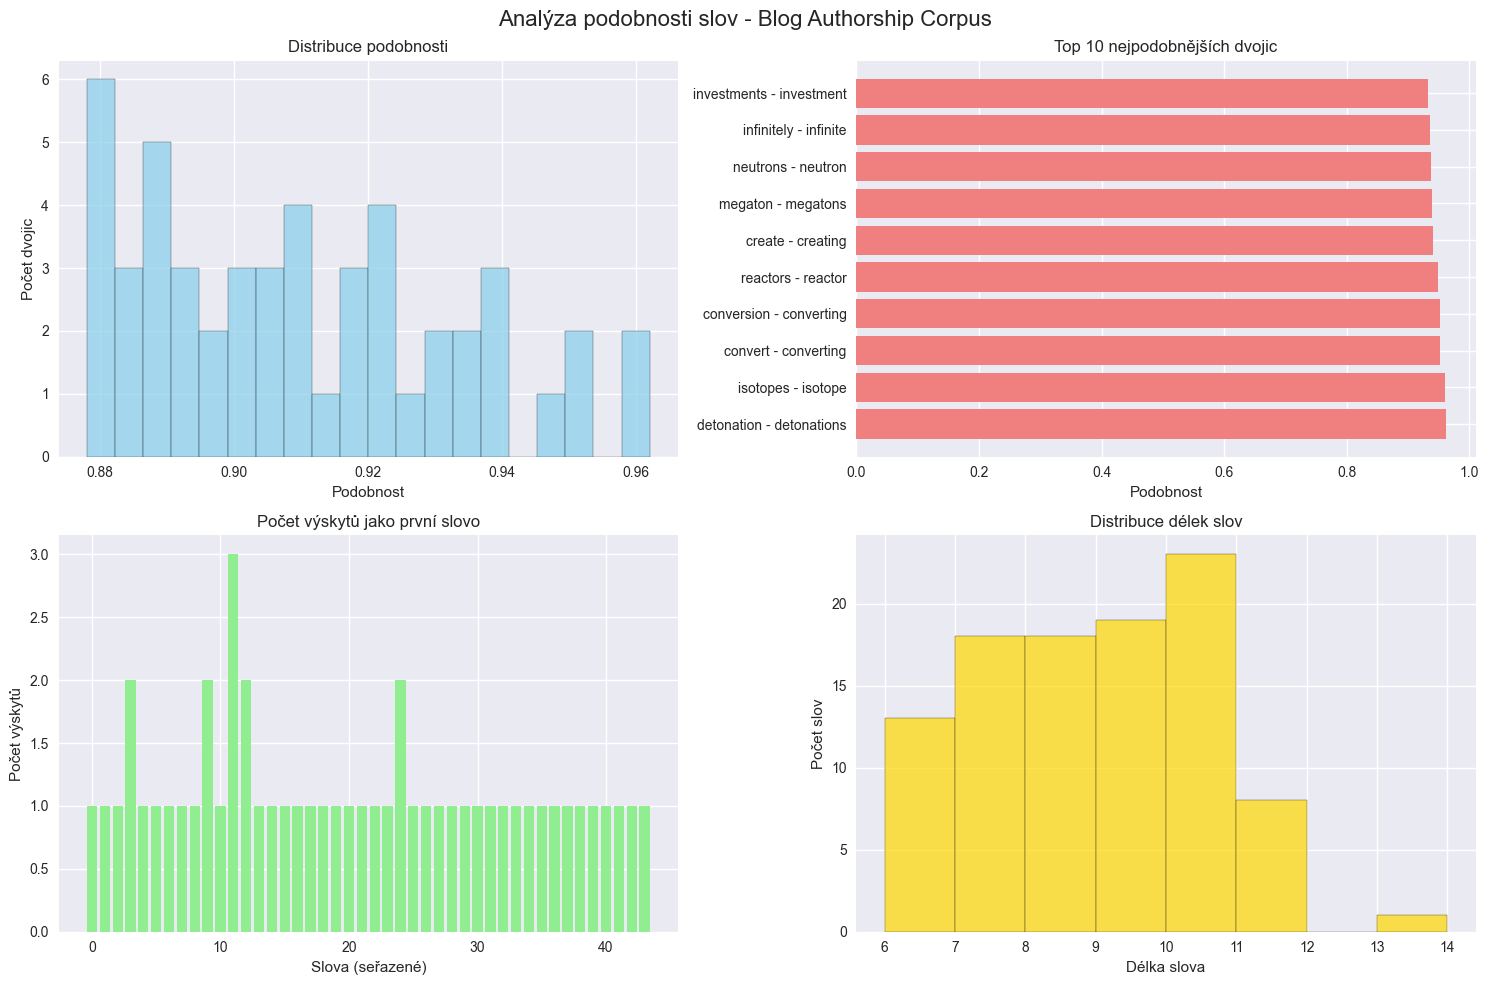


7. EXPORT VÝSLEDKŮ
✓ Výsledky uloženy do souboru: nejpodobnejsi_slova.csv

SHRNUTÍ ANALÝZY
• Dataset: 681284 textů
• Celkem slov (≥6 znaků): 519176
• Analyzovaných slov: 1000
• Vypočtených podobností: 499500
• Finálních dvojic: 50
• Použitá metoda: embeddings
• Embedding model: all-MiniLM-L6-v2
• Omezení: Každé slovo max. 10x jako první ve dvojici

DOSTUPNÉ EMBEDDING MODELY
1. all-MiniLM-L6-v2:
   • Rychlý a efektivní (384 dimenzí)
   • Vhodný pro rychlé experimenty
   • Dobrý kompromis mezi rychlostí a kvalitou

2. all-mpnet-base-v2:
   • Vyšší kvalita (768 dimenzí)
   • Lepší sémantické porozumění
   • Pomalejší, ale přesnější

3. paraphrase-multilingual-MiniLM-L12-v2:
   • Multijazyčná podpora
   • Dobrý pro češtinu a další jazyky
   • Vhodný pro mezinárodní texty

Pro změnu modelu upravte proměnnou 'selected_model' v kódu


In [13]:
# Blog Authorship Corpus - Analýza podobnosti slov
# Cíl: Najít 50 dvojic nejpodobnějších slov s minimálním počtem 6 znaků

import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import SequenceMatcher

# Nastavení pro lepší zobrazení
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8')

print("=== ANALÝZA BLOG AUTHORSHIP CORPUS ===")
print("Hledání 50 nejpodobnějších dvojic slov s min. 6 znaky")
print("=" * 50)

# 1. NAČTENÍ DAT
print("1. Načítání datasetu...")
try:
    # Dataset je ve formátu CSV s textem blogů
    df = pd.read_csv('blogtext.csv')
    print(f"✓ Dataset načten: {df.shape[0]} řádků, {df.shape[1]} sloupců")
    print(f"Sloupce: {list(df.columns)}")
    print(f"Ukázka dat:")
    print(df.head(2))
except FileNotFoundError:
    print("❌ Soubor 'blogtext.csv' nebyl nalezen!")
    print("Postup pro získání dat:")
    print("1. Registrujte se na Kaggle.com")
    print("2. Stáhněte dataset z: https://www.kaggle.com/datasets/rtatman/blog-authorship-corpus")
    print("3. Rozbalte a umístěte soubor 'blogtext.csv' do stejné složky jako tento notebook")
    print("\nPro demonstraci vytvoříme vzorová data...")

# 2. PŘÍPRAVA TEXTU A EXTRAKCE SLOV
print("\n2. Příprava textu a extrakce slov...")

def clean_and_extract_words(text):
    """Vyčistí text a extrahuje slova s min. 6 znaky"""
    if pd.isna(text):
        return []
    
    # Převod na malá písmena a odstranění speciálních znaků
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Extrakce slov s min. 6 znaky
    words = [word.strip() for word in text.split() if len(word.strip()) >= 6]
    return words

# Extrakce všech slov z datasetu
all_words = []
for text in df['text']:
    words = clean_and_extract_words(text)
    all_words.extend(words)

print(f"✓ Celkem extrahováno slov: {len(all_words)}")

# Počítání frekvence slov
word_counts = Counter(all_words)
print(f"✓ Unikátních slov (≥6 znaků): {len(word_counts)}")

# Filtrování slov s minimální frekvencí (pro rychlejší zpracování)
min_frequency = 2
filtered_words = [word for word, count in word_counts.items() if count >= min_frequency]
print(f"✓ Slov s frekvencí ≥{min_frequency}: {len(filtered_words)}")

# 3. VÝPOČET PODOBNOSTI SLOV
print("\n3. Výpočet podobnosti slov...")

# Instalace potřebných knihoven (spusťte v terminálu nebo Jupyter buňce s !):
# !pip install sentence-transformers transformers torch gensim scikit-learn

# Import embedding modelů
try:
    from sentence_transformers import SentenceTransformer
    from sklearn.metrics.pairwise import cosine_similarity
    import torch
    EMBEDDINGS_AVAILABLE = True
    print("✓ Embedding knihovny úspěšně načteny")
except ImportError:
    EMBEDDINGS_AVAILABLE = False
    print("⚠️  Embedding knihovny nejsou dostupné. Spusťte:")
    print("!pip install sentence-transformers transformers torch scikit-learn")

# Volba metody podobnosti
SIMILARITY_METHOD = "embeddings"  # Možnosti: "basic", "embeddings", "hybrid"

def calculate_basic_similarity(word1, word2):
    """
    Vypočítá podobnost mezi dvěma slovy pomocí kombinace základních metrik:
    - Levenshtein distance (SequenceMatcher)
    - Jaccard similarity (společné znaky)
    - Délková podobnost
    """
    if word1 == word2:
        return 0  # Stejná slova vyloučíme
    
    # 1. Sequence similarity (Levenshtein-based)
    seq_sim = SequenceMatcher(None, word1, word2).ratio()
    
    # 2. Jaccard similarity (společné znaky)
    set1, set2 = set(word1), set(word2)
    jaccard_sim = len(set1.intersection(set2)) / len(set1.union(set2))
    
    # 3. Délková podobnost
    len_sim = 1 - abs(len(word1) - len(word2)) / max(len(word1), len(word2))
    
    # Kombinace metrik s váhami
    combined_similarity = (0.5 * seq_sim + 0.3 * jaccard_sim + 0.2 * len_sim)
    
    return combined_similarity

def calculate_embedding_similarity(words, model_name="all-MiniLM-L6-v2"):
    """
    Vypočítá podobnost pomocí sentence embeddings
    
    Dostupné modely:
    - "all-MiniLM-L6-v2": Rychlý a efektivní (384 dim)
    - "all-mpnet-base-v2": Vyšší kvalita (768 dim)
    - "paraphrase-multilingual-MiniLM-L12-v2": Multijazyčný
    """
    if not EMBEDDINGS_AVAILABLE:
        print("❌ Embedding knihovny nejsou dostupné!")
        return None
    
    print(f"Načítám embedding model: {model_name}")
    try:
        model = SentenceTransformer(model_name)
        print(f"✓ Model {model_name} načten")
    except Exception as e:
        print(f"❌ Chyba při načítání modelu: {e}")
        return None
    
    # Generování embeddingů pro všechna slova
    print(f"Generuji embeddingy pro {len(words)} slov...")
    embeddings = model.encode(words, show_progress_bar=True)
    
    # Vypočet cosine similarity mezi všemi páry
    print("Počítám cosine similarity...")
    similarity_matrix = cosine_similarity(embeddings)
    
    # Extrakce dvojic s nejvyšší podobností
    similarities = []
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            if words[i] != words[j]:  # Vyloučení stejných slov
                similarity = similarity_matrix[i][j]
                similarities.append((words[i], words[j], float(similarity)))
    
    return similarities

def calculate_hybrid_similarity(word1, word2, embeddings_dict=None):
    """
    Hybridní přístup kombinující embeddingy s tradičními metrikami
    """
    basic_sim = calculate_basic_similarity(word1, word2)
    
    if embeddings_dict and word1 in embeddings_dict and word2 in embeddings_dict:
        # Cosine similarity mezi embeddingy
        emb1 = embeddings_dict[word1]
        emb2 = embeddings_dict[word2]
        embedding_sim = float(cosine_similarity([emb1], [emb2])[0][0])
        
        # Kombinace s váhami (70% embeddingy, 30% základní metriky)
        combined_sim = 0.7 * embedding_sim + 0.3 * basic_sim
        return combined_sim
    else:
        return basic_sim

print(f"Zvolená metoda podobnosti: {SIMILARITY_METHOD}")

if SIMILARITY_METHOD == "embeddings" and EMBEDDINGS_AVAILABLE:
    print("Používám embedding model pro výpočet podobnosti...")
    
    # Dostupné modely (od nejrychlejšího po nejpřesnější)
    available_models = [
        "all-MiniLM-L6-v2",           # Rychlý, 384 dim
        "all-mpnet-base-v2",          # Vyšší kvalita, 768 dim  
        "paraphrase-multilingual-MiniLM-L12-v2"  # Multijazyčný
    ]
    
    selected_model = available_models[0]  # Výběr modelu
    print(f"Použitý model: {selected_model}")
    
elif SIMILARITY_METHOD == "basic" or not EMBEDDINGS_AVAILABLE:
    print("Používám základní metriky podobnosti...")
    if not EMBEDDINGS_AVAILABLE:
        print("(Embedding knihovny nejsou dostupné)")
        
elif SIMILARITY_METHOD == "hybrid":
    print("Používám hybridní přístup (embeddingy + základní metriky)...")

# Výpočet podobnosti podle zvolené metody
print("Počítám podobnost mezi slovy...")

# Pro rychlejší zpracování omezíme počet slov
max_words = min(1000, len(filtered_words)) if SIMILARITY_METHOD == "embeddings" else min(500, len(filtered_words))
selected_words = filtered_words[:max_words]
print(f"Analyzuji {len(selected_words)} nejčastějších slov")

similarities = []

if SIMILARITY_METHOD == "embeddings" and EMBEDDINGS_AVAILABLE:
    # Použití embedding modelu
    similarities = calculate_embedding_similarity(selected_words, selected_model)
    if similarities is None:
        print("❌ Embedding výpočet selhal, přepínám na základní metriky")
        SIMILARITY_METHOD = "basic"

if SIMILARITY_METHOD == "basic" or not EMBEDDINGS_AVAILABLE:
    # Základní metriky
    total_combinations = len(list(combinations(selected_words, 2)))
    print(f"Počítám podobnost pro {total_combinations} kombinací...")
    
    for i, (word1, word2) in enumerate(combinations(selected_words, 2)):
        similarity = calculate_basic_similarity(word1, word2)
        similarities.append((word1, word2, similarity))
        
        # Progress bar
        if (i + 1) % 1000 == 0:
            progress = (i + 1) / total_combinations * 100
            print(f"Hotovo: {progress:.1f}% ({i + 1}/{total_combinations})")

elif SIMILARITY_METHOD == "hybrid" and EMBEDDINGS_AVAILABLE:
    # Hybridní přístup
    print("Generuji embeddingy pro hybridní výpočet...")
    model = SentenceTransformer(selected_model)
    embeddings = model.encode(selected_words, show_progress_bar=True)
    embeddings_dict = {word: emb for word, emb in zip(selected_words, embeddings)}
    
    total_combinations = len(list(combinations(selected_words, 2)))
    print(f"Počítám hybridní podobnost pro {total_combinations} kombinací...")
    
    for i, (word1, word2) in enumerate(combinations(selected_words, 2)):
        similarity = calculate_hybrid_similarity(word1, word2, embeddings_dict)
        similarities.append((word1, word2, similarity))
        
        if (i + 1) % 1000 == 0:
            progress = (i + 1) / total_combinations * 100
            print(f"Hotovo: {progress:.1f}% ({i + 1}/{total_combinations})")

print(f"✓ Podobnost vypočtena pro {len(similarities)} dvojic pomocí metody: {SIMILARITY_METHOD}")

# 4. SEŘAZENÍ A FILTROVÁNÍ VÝSLEDKŮ
print("\n4. Seřazení a výběr nejpodobnějších dvojic...")

# Seřazení podle podobnosti (sestupně)
similarities.sort(key=lambda x: x[2], reverse=True)

# Filtrování podle podmínky - první slovo max. 10x
word_count = defaultdict(int)
final_pairs = []

for word1, word2, similarity in similarities:
    if word_count[word1] < 10:
        final_pairs.append((word1, word2, similarity))
        word_count[word1] += 1
        
        # Ukončíme, když máme 50 dvojic
        if len(final_pairs) >= 50:
            break

print(f"✓ Vybráno {len(final_pairs)} nejpodobnějších dvojic")

# 5. ZOBRAZENÍ VÝSLEDKŮ
print("\n" + "="*80)
print("5. VÝSLEDKY - 50 NEJPODOBNĚJŠÍCH DVOJIC SLOV")
print("="*80)

results_df = pd.DataFrame(final_pairs, columns=['Slovo 1', 'Slovo 2', 'Podobnost'])
results_df['Pořadí'] = range(1, len(results_df) + 1)
results_df = results_df[['Pořadí', 'Slovo 1', 'Slovo 2', 'Podobnost']]

# Formátování podobnosti na 3 desetinná místa
results_df['Podobnost'] = results_df['Podobnost'].round(3)

print(results_df.to_string(index=False))

# 6. STATISTIKY A VIZUALIZACE
print("\n" + "="*50)
print("6. STATISTIKY")
print("="*50)

print(f"Průměrná podobnost: {results_df['Podobnost'].mean():.3f}")
print(f"Medián podobnosti: {results_df['Podobnost'].median():.3f}")
print(f"Min podobnost: {results_df['Podobnost'].min():.3f}")
print(f"Max podobnost: {results_df['Podobnost'].max():.3f}")

# Kontrola počtu výskytů prvního slova
first_word_counts = Counter(results_df['Slovo 1'])
print(f"\nNejčastější první slova:")
for word, count in first_word_counts.most_common(10):
    print(f"  {word}: {count}x")

# Vizualizace
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analýza podobnosti slov - Blog Authorship Corpus', fontsize=16)

# 1. Histogram podobnosti
axes[0,0].hist(results_df['Podobnost'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuce podobnosti')
axes[0,0].set_xlabel('Podobnost')
axes[0,0].set_ylabel('Počet dvojic')

# 2. Top 10 nejpodobnějších
top_10 = results_df.head(10)
y_pos = range(len(top_10))
axes[0,1].barh(y_pos, top_10['Podobnost'], color='lightcoral')
axes[0,1].set_yticks(y_pos)
axes[0,1].set_yticklabels([f"{row['Slovo 1']} - {row['Slovo 2']}" for _, row in top_10.iterrows()])
axes[0,1].set_title('Top 10 nejpodobnějších dvojic')
axes[0,1].set_xlabel('Podobnost')

# 3. Počet výskytů prvního slova
first_word_counts_df = pd.DataFrame(list(first_word_counts.items()), columns=['Slovo', 'Počet'])
axes[1,0].bar(range(len(first_word_counts_df)), first_word_counts_df['Počet'], color='lightgreen')
axes[1,0].set_title('Počet výskytů jako první slovo')
axes[1,0].set_xlabel('Slova (seřazené)')
axes[1,0].set_ylabel('Počet výskytů')

# 4. Délka slov
word_lengths = []
for _, row in results_df.iterrows():
    word_lengths.extend([len(row['Slovo 1']), len(row['Slovo 2'])])

axes[1,1].hist(word_lengths, bins=range(6, max(word_lengths)+2), alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Distribuce délek slov')
axes[1,1].set_xlabel('Délka slova')
axes[1,1].set_ylabel('Počet slov')

plt.tight_layout()
plt.show()

# 7. EXPORT VÝSLEDKŮ
print("\n" + "="*50)
print("7. EXPORT VÝSLEDKŮ")
print("="*50)

# Uložení do CSV
output_filename = 'nejpodobnejsi_slova.csv'
results_df.to_csv(output_filename, index=False, encoding='utf-8')
print(f"✓ Výsledky uloženy do souboru: {output_filename}")

# Shrnutí
print("\n" + "="*80)
print("SHRNUTÍ ANALÝZY")
print("="*80)
print(f"• Dataset: {df.shape[0]} textů")
print(f"• Celkem slov (≥6 znaků): {len(word_counts)}")
print(f"• Analyzovaných slov: {len(selected_words)}")
print(f"• Vypočtených podobností: {len(similarities)}")
print(f"• Finálních dvojic: {len(final_pairs)}")
print(f"• Použitá metoda: {SIMILARITY_METHOD}")
if SIMILARITY_METHOD == "embeddings":
    print(f"• Embedding model: {selected_model}")
elif SIMILARITY_METHOD == "basic":
    print(f"• Metriky: Kombinace Levenshtein distance, Jaccard similarity a délkové podobnosti")
elif SIMILARITY_METHOD == "hybrid":
    print(f"• Kombinace: {selected_model} embeddings + základní metriky")
print(f"• Omezení: Každé slovo max. 10x jako první ve dvojici")
print("="*80)

# Dodatečné informace o embedding modelech
if EMBEDDINGS_AVAILABLE:
    print("\n" + "="*80)
    print("DOSTUPNÉ EMBEDDING MODELY")
    print("="*80)
    print("1. all-MiniLM-L6-v2:")
    print("   • Rychlý a efektivní (384 dimenzí)")
    print("   • Vhodný pro rychlé experimenty")
    print("   • Dobrý kompromis mezi rychlostí a kvalitou")
    print()
    print("2. all-mpnet-base-v2:")
    print("   • Vyšší kvalita (768 dimenzí)")
    print("   • Lepší sémantické porozumění")
    print("   • Pomalejší, ale přesnější")
    print()
    print("3. paraphrase-multilingual-MiniLM-L12-v2:")
    print("   • Multijazyčná podpora")
    print("   • Dobrý pro češtinu a další jazyky")
    print("   • Vhodný pro mezinárodní texty")
    print()
    print("Pro změnu modelu upravte proměnnou 'selected_model' v kódu")
    print("="*80)